In [56]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import os
import pandas as pd

In [57]:
f=open('fit_ejercise.npy', 'r')
f

<_io.TextIOWrapper name='fit_ejercise.npy' mode='r' encoding='UTF-8'>

In [58]:
f=np.load('fit_ejercise.npy')
f

array([[ 0.59677897,  0.9210494 ,  1.15618395,  1.75451756,  1.8249173 ,
         2.26851454,  2.28263231,  2.50455365,  2.86139335,  2.93714046,
         3.12261223,  3.17285482,  3.22958914,  3.43178016,  3.61788656,
         3.92117518,  3.98044255,  4.14826212,  4.2310646 ,  4.2583029 ,
         4.26351307,  4.30862763,  4.33701173,  4.38572245,  4.80931901,
         4.83034264,  4.93685098,  5.01836676,  5.19485119,  5.31551374,
         5.31827587,  5.51314769,  6.11023511,  6.12894526,  6.23952952,
         6.30976124,  6.34400959,  6.84829739,  6.96469186,  7.1946897 ,
         7.22443383,  7.24455325,  7.29049707,  7.37995406,  8.49431794,
         8.66309158,  8.93389163,  9.44160018,  9.80764198,  9.85559786],
       [ 8.11257148,  3.52815075,  4.81023356,  0.89238164,  3.13295195,
         3.53338034,  1.89933975,  2.83896349,  0.89713921,  0.9500022 ,
         1.45700044,  1.05318568,  1.71011605,  0.06780647,  0.40019114,
         1.00444563, -0.02239716,  0.35714018,  0.

<ErrorbarContainer object of 3 artists>

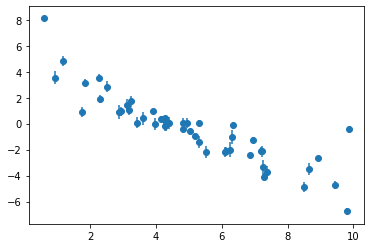

In [62]:
x=f[0]
y=f[1]
err=f[2]
plt.errorbar(x, y, yerr=err,  xerr=None, fmt='o', label='data')

In [60]:
def line (x,m,b):                       # Modelo a probar
    return ((m*x)+b)


def chisq(theta, data):                 # Donde theta son los datos que se generan a aprtir del montecarlo 
    x= data[0]                          # (theta(0) es la pendiente (a) y theta(1) es la ordenada al origen (b))
    y= data[1]
    yerr= data[2]
    #lo siguiente depende del modelo 
    model= line(x, theta[0], theta[1])
    chisq= (y-model)**2 / yerr**2
    return chisq.sum()

def comparacion(chisq_ini, chisq_new):  #funcioón para comparar los modelos
    a=np.log(np.random.uniform(0,1))
    
    if chisq_new < chisq_ini:
        chisq_ini= chisq_new
        acc=True
        
    elif (chisq_ini-chisq_new) > a:
        chisq_ini= chisq_new
        acc=True
    
    else: 
        chisq_ini= chisq_ini
        acc=False
            
    return chisq_ini, acc

def montecarlo(a_ini, b_ini, data, s2, n):
    
    chisqr_stor=np.zeros(n)
    a=np.zeros(n)
    b=np.zeros(n)
    k=0               #Contador devalores acepados
    
    for i in range(n):
    
        a[i]=a_ini
        b[i]=b_ini
    
        a_new =s2* np.random.randn()+ a_ini
        b_new =s2* np.random.randn()+ b_ini   #Se generan los nuevos pares de parámetros
    
        chisqr_ini=chisq([a_ini,b_ini], data)
        chisqr_new=chisq([a_new,b_new], data)
        chisqr_stor[i]= chisqr_ini


        chisq_comp,acc= comparacion(chisqr_ini, chisqr_new)
            
        if acc is not True: # == chisqr_ini:
            a_ini=a_ini
            b_ini=b_ini
        else:
            a_ini=a_new
            b_ini=b_new
            k= k + 1
        
    
    return a, b, chisqr_stor, k
    



In [49]:
param= []

for i in range (5):
    #a_ini=np.random.uniform(0,5)
    #b_ini=np.random.uniform(-1,5)
    a_ini, b_ini= -2.5,3.5
    chisqr_ini=chisq([a_ini,b_ini], [x, y, err] )
    parametros=montecarlo(a_ini, b_ini, [x, y, err], err, 10000)
    
    param.append(parametros)

param1=param[1]
k=param1[3]
k

6595

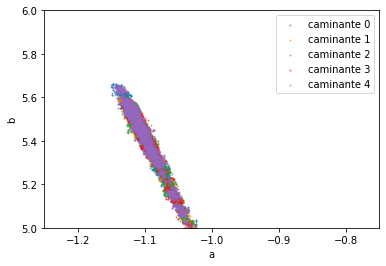

In [54]:
for i in range (5):
    pa= param[i]
    plt.scatter(pa[0], pa[1], s=1, alpha=0.5, label= 'caminante {0}'.format(i))
   
    plt.xlim(-1.25,-0.75)
    plt.ylim(5,6)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.legend(frameon = True)
k=param[3]


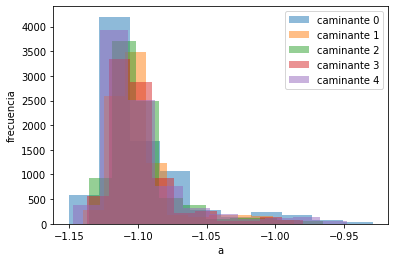

In [63]:
for i in range (5):
    a_c= param[i]
    a_=a_c[0]
    plt.hist(a_[1500:], alpha=0.5, label= 'caminante {0}'.format(i))
    
#plt.axvline(a, color = 'black', label = 'a_real')

plt.xlabel('a')
plt.ylabel('frecuencia')
plt.legend(frameon = True)

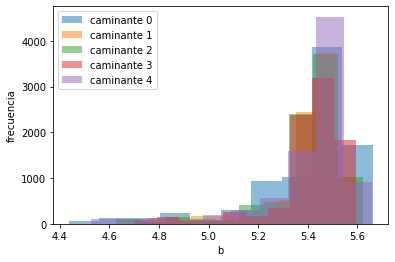

In [64]:
for i in range (5):
    b_c= param[i]
    b_=b_c[1]
    plt.hist(b_[1500:], alpha=0.5, label= 'caminante {0}'.format(i))
    
#plt.axvline(b, color = 'black', label = 'b_real')
plt.xlabel('b')
plt.ylabel('frecuencia')
plt.legend(frameon = True)